# Mid-Term project

The file fatal-police-shootings-data.csv contains data about each fatal shooting
Each row has the following variables:

**id:** a unique identifier for each victim

**name:** the name of the victim

**date:** the date of the fatal shooting in YYYY-MM-DD format

**manner_of_death:**

- shot
- shot and Tasered
- armed: indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm

undetermined: it is not known whether or not the victim had a weapon
unknown: the victim was armed, but it is not known what the object was
unarmed: the victim was not armed
age: the age of the victim

**gender:** the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.

- M: Male
- F: Female
- None: unknown

**city:** the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.

**state:** two-letter postal code abbreviation

**signs of mental illness:** News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.

**threat_level:** The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.

**flee:** News reports have indicated the victim was moving away from officers

- Foot
- Car
- Not fleeing

**body_camera:** News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

Link: https://github.com/washingtonpost/data-police-shootings/blob/master/fatal-police-shootings-data.csv

In [2]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime

In [3]:
df = pd.read_csv("F://fatal-police-shootings-data.csv")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [5]:
df.shape

(6600, 17)

In [6]:
df.describe()

,id,age,longitude,latitude
count,6600.000000,6294.000000,6286.000000,6286.000000
mean,3654.619848,37.118843,-97.168225,36.663852
std,2062.848117,12.992958,16.650535,5.391765
min,3.000000,6.000000,-160.007000,19.498000
25%,1861.750000,27.000000,-112.091750,33.477250
50%,3665.000000,35.000000,-94.344000,36.094000
75%,5441.250000,45.000000,-83.124750,39.998750
max,7200.000000,91.000000,-67.867000,71.301000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 17 columns):
id                         6600 non-null int64
name                       6337 non-null object
date                       6600 non-null object
manner_of_death            6600 non-null object
armed                      6394 non-null object
age                        6294 non-null float64
gender                     6597 non-null object
race                       5846 non-null object
city                       6600 non-null object
state                      6600 non-null object
signs_of_mental_illness    6600 non-null bool
threat_level               6600 non-null object
flee                       6109 non-null object
body_camera                6600 non-null bool
longitude                  6286 non-null float64
latitude                   6286 non-null float64
is_geocoding_exact         6600 non-null bool
dtypes: bool(3), float64(3), int64(1), object(10)
memory usage: 741.3+ KB


In [8]:
df.ndim

2

## Data Preprocessing

In [9]:
df[df['gender'].isnull()]   

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
2652,2956,Scout Schultz,2017-09-16,shot,knife,21.0,NaN,W,Atlanta,GA,True,other,Not fleeing,False,NaN,NaN,True
6426,7007,NaN,2021-07-07,shot,undetermined,NaN,NaN,NaN,Tesuque,NM,False,undetermined,NaN,False,-105.922,35.744,True
6516,7107,George Michael Mireles,2021-08-20,shot,gun,34.0,NaN,NaN,Amarillo,TX,False,attack,NaN,False,-101.820,35.198,True


In [255]:
df['gender'].fillna({2652:'M',6516:'M'},inplace=True)

In [256]:
df[df['gender'].isnull()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
6426,7007,NaN,2021-07-07,shot,undetermined,NaN,NaN,NaN,Tesuque,NM,False,undetermined,NaN,False,-105.922,35.744,True


## Data Cleaning

In [257]:
a =df.drop([6426],axis=0)
a

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,7184,Ronnie Andrew Garcia,2021-09-25,shot,gun,43.0,M,H,Huntington Beach,CA,False,other,NaN,False,-118.004,33.655,True
6596,7186,Sandra Barajas,2021-09-25,shot,knife,30.0,F,H,Delano,CA,False,attack,Not fleeing,False,-119.239,35.783,True
6597,7187,Christian Smith,2021-09-25,shot,gun,33.0,M,NaN,Decatur,GA,False,other,NaN,False,-84.280,33.727,True
6598,7195,Gloria Marie Strong,2021-09-27,shot,gun,27.0,F,NaN,Allen,TX,False,attack,Foot,False,-96.676,33.101,True


In [258]:
cd = a.drop(['race','latitude','longitude'],axis=1)
cd

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Shelton,WA,True,attack,Not fleeing,False,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,Aloha,OR,False,attack,Not fleeing,False,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Wichita,KS,False,other,Not fleeing,False,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,San Francisco,CA,True,attack,Not fleeing,False,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Evans,CO,False,attack,Not fleeing,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,7184,Ronnie Andrew Garcia,2021-09-25,shot,gun,43.0,M,Huntington Beach,CA,False,other,NaN,False,True
6596,7186,Sandra Barajas,2021-09-25,shot,knife,30.0,F,Delano,CA,False,attack,Not fleeing,False,True
6597,7187,Christian Smith,2021-09-25,shot,gun,33.0,M,Decatur,GA,False,other,NaN,False,True
6598,7195,Gloria Marie Strong,2021-09-27,shot,gun,27.0,F,Allen,TX,False,attack,Foot,False,True


In [259]:
age_mean= cd['age'].mean()
average_age=math.trunc(age_mean)
average_age

37

In [260]:
cd['name'].fillna('No name',inplace=True)
cd['armed'].fillna('Not known',inplace = True)
cd['flee'].fillna('Other',inplace = True)
cd['age'].fillna(average_age,inplace = True)

In [261]:
cd.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
is_geocoding_exact         0
dtype: int64

## Data Visualization

In [4]:
corelation = cd.corr()

NameError: name 'cd' is not defined

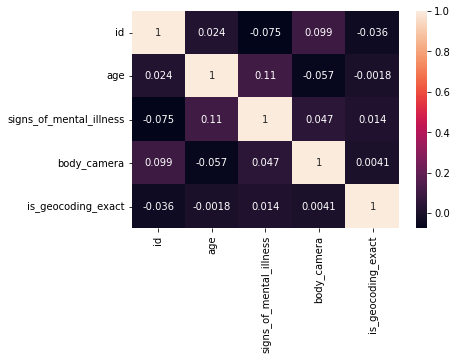

In [263]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels= corelation.columns, annot = True)

In [264]:
gender_value = cd['gender'].value_counts()
gender_value

M    6305
F     294
Name: gender, dtype: int64

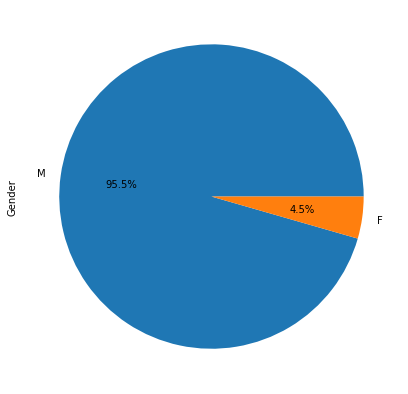

In [265]:
plt.figure(figsize=(20,7))
cd['gender'].value_counts().plot(kind = 'pie',autopct='%.1f%%',label= 'Gender')

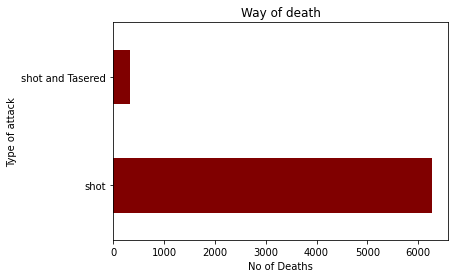

In [307]:
#type of way the person was attacked
cd.manner_of_death.value_counts().sort_values(ascending=False).plot(kind= 'barh',color='maroon',title='Way of death')
plt.xlabel("No of Deaths")
plt.ylabel("Type of attack")
plt.show()

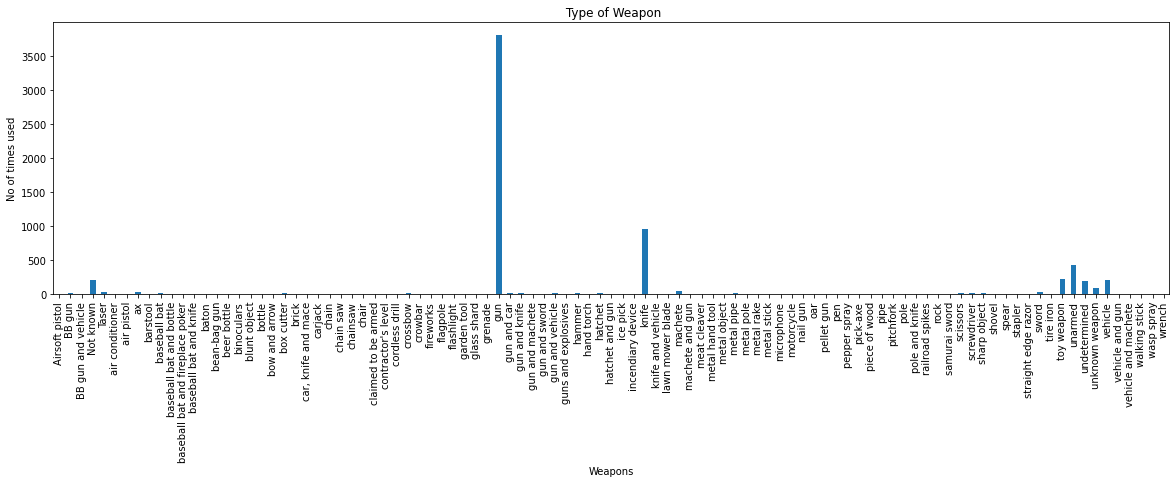

In [268]:
#weapon used while attacking
plt.figure(figsize=(20,5))
cd.groupby('armed').size().plot(kind = 'bar',title=' Type of Weapon')
plt.xlabel("Weapons")
plt.ylabel("No of times used")
plt.show()

In [269]:
#Shot and Tasered data
st = cd[cd.manner_of_death.str.contains('shot and Tasered')] 
st.head()

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Wichita,KS,False,other,Not fleeing,False,True
10,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,M,Stockton,CA,False,attack,Not fleeing,False,True
23,45,Salvador Figueroa,2015-01-11,shot and Tasered,gun,29.0,M,North Las Vegas,NV,False,attack,Foot,False,True
38,68,Zaki Shinwary,2015-01-16,shot and Tasered,knife,48.0,M,Fremont,CA,False,other,Not fleeing,False,True
43,83,Carter Castle,2015-01-18,shot and Tasered,gun,67.0,M,Gunlock,KY,True,attack,Not fleeing,False,True


In [270]:
st.shape

(331, 14)

In [271]:
#shot and tasered data with state
st_state = st.groupby('state').size().sort_values(ascending = False) 
st_state 

state
CA    61
TX    39
FL    22
GA    17
OK    16
PA    14
AZ    13
WA    10
NY    10
NV     8
AL     8
IL     7
CO     7
MI     7
OH     7
LA     6
NC     6
MN     5
IN     5
OR     5
SC     5
KS     4
CT     4
HI     4
MT     4
NM     4
TN     4
WI     3
MO     3
VA     3
AR     3
MD     2
KY     2
NE     2
UT     2
WY     1
IA     1
ID     1
MA     1
ME     1
MS     1
ND     1
VT     1
AK     1
dtype: int64

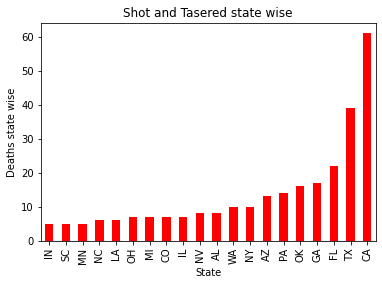

In [321]:
#checking which state has highest shot and tasered incident
st_state.sort_values(ascending=False).head(20).sort_values().plot(kind='bar',title='Shot and Tasered state wise',color='r')  
plt.xlabel("State")
plt.ylabel("Deaths state wise")
plt.show()

In [274]:
#getting only month from the colum of date
cd['date'] = pd.to_datetime(cd['date'], errors='coerce')
cd['month'] = cd['date'].dt.month

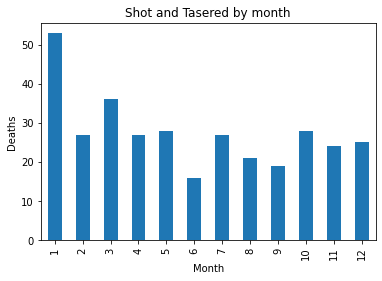

In [275]:
#In which month the incidents took more
st.groupby(cd['month']).size().plot(kind = 'bar',title = 'Shot and Tasered by month') 
plt.xlabel("Month")
plt.ylabel("Deaths")
plt.show()

In [276]:
#Shot data
shot = cd[cd.manner_of_death == 'shot']
shot.head()

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact,month
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Shelton,WA,True,attack,Not fleeing,False,True,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,Aloha,OR,False,attack,Not fleeing,False,True,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,San Francisco,CA,True,attack,Not fleeing,False,True,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Evans,CO,False,attack,Not fleeing,False,True,1
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,Guthrie,OK,False,attack,Not fleeing,False,True,1


In [277]:
shot.shape

(6268, 15)

In [278]:
shot_state = shot.groupby('state').size().sort_values(ascending = False)
shot_state

state
CA    913
TX    549
FL    408
AZ    289
CO    230
GA    226
NC    179
OH    179
OK    175
TN    171
WA    168
MO    160
NM    128
IL    123
LA    123
PA    122
AL    116
IN    116
KY    115
NY    110
VA    110
WI    103
NV    102
OR    102
MI     98
SC     97
MD     95
AR     92
MS     83
UT     80
NJ     77
MN     71
WV     62
KS     58
ID     52
AK     46
MA     42
IA     38
MT     36
HI     32
NE     32
ME     26
DC     20
SD     20
CT     19
NH     18
DE     16
WY     14
ND     13
VT     10
RI      4
dtype: int64

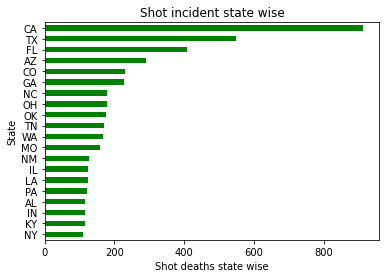

In [322]:
shot_state.sort_values(ascending=False).head(20).sort_values().plot(kind='barh',title='Shot incident state wise',color='g')
plt.xlabel("Shot deaths state wise")
plt.ylabel("State")
plt.show()

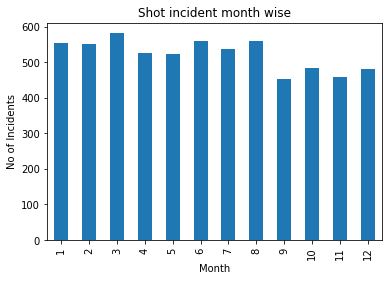

In [281]:
shot.groupby(cd['month']).size().plot(kind = 'bar',title='Shot incident month wise')
plt.xlabel("Month")
plt.ylabel("No of Incidents")
plt.show()

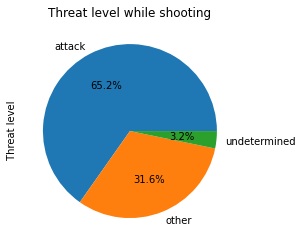

In [280]:
shot.groupby('threat_level').size().plot(kind = 'pie',autopct = '%1.1f%%',label=' Threat level',title='Threat level while shooting')
plt.show()

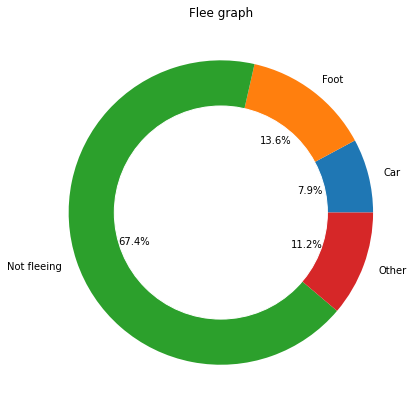

In [273]:
#checking the way the victim was moved from officer
plt.figure(figsize=(20,7))
st.groupby('flee').size().plot(kind = 'pie',autopct = '%1.1f%%',title='Flee graph',label='')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [282]:
#getting only year from the colum of date
cd['date'] = pd.to_datetime(cd['date'], errors='coerce')
cd['year'] = cd['date'].dt.year

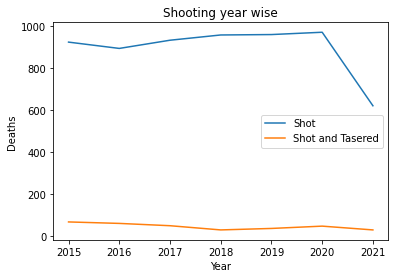

In [299]:
#representing the deaths according to years
death_yr_shot = shot.groupby(cd['year']).size().plot(kind='line',title='Shooting year wise')
death_yr_st=st.groupby(cd['year']).size().plot(kind='line',title='Shooting year wise')
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.legend(['Shot','Shot and Tasered'])
plt.show(death_yr_shot,death_yr_st)


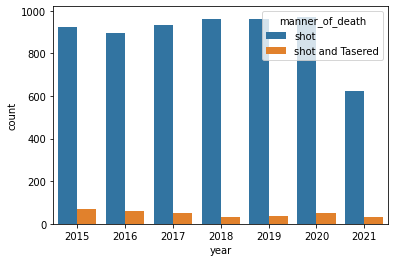

In [240]:
sns.countplot(x='year',data=cd,hue='manner_of_death')

In [287]:
#police were recording with camera while shooting
pwc = cd.groupby('body_camera').size().sort_values(ascending=False)

body_camera
False    5688
True      911
dtype: int64

In [288]:
pwc_yes = cd[cd.body_camera == True]
pwc_yes.head()

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact,month,year
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,Burlington,IA,False,other,Not fleeing,True,True,1,2015
14,27,Omarr Julian Maximillian Jackson,2015-01-07,shot,gun,37.0,M,New Orleans,LA,False,attack,Foot,True,True,1,2015
16,32,James Dudley Barker,2015-01-08,shot,shovel,42.0,M,Salt Lake City,UT,False,attack,Not fleeing,True,True,1,2015
18,37,Thomas Hamby,2015-01-08,shot,gun,49.0,M,Syracuse,UT,False,attack,Not fleeing,True,True,1,2015
24,46,John Edward O'Keefe,2015-01-13,shot,gun,34.0,M,Albuquerque,NM,False,attack,Foot,True,True,1,2015


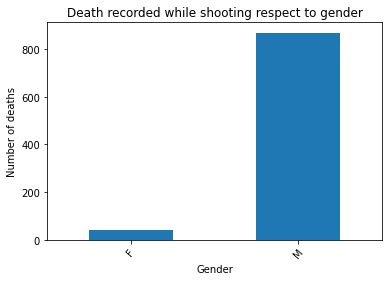

In [289]:
pwc_yes.groupby(cd['gender']).size().sort_values().plot(kind='bar',title='Death recorded while shooting respect to gender')
plt.xticks(rotation=50)
plt.xlabel("Gender")
plt.ylabel("Number of deaths")
plt.show()

## *Insights*
- The data shows how many people were death gender based.
- Showing the type of attack by police. 
- Types of weapons used for shooting.
- Reprsenting data with respect to the type of attacks.
- Presenting the attacks State wise. 
- Pie graph of threat level with respect to the shot attack.
- Checking whether the victim was moved from the officer after the attack.
- To know how many deaths were happened according to the years.
- While attacking, if the death was recorded or not.